Este proyecto utiliza un modelo de **Regresión Logística** para predecir si una revisión de película es positiva o negativa basado en su texto.

## Paso 1: Importación de librerías necesarias

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Paso 2: Carga del Dataset

In [5]:
# Cargar el dataset
archivo = 'Datasets/IMDB Dataset.csv'
df = pd.read_csv(archivo)

# Mostrar las primeras filas del dataset
print("Muestra del Dataset:")
print(df.head())

Muestra del Dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


## Paso 3: Verificación de valores nulos

In [7]:
# Comprobar si hay valores nulos
df.isnull().sum()

review       0
sentiment    0
dtype: int64

## Paso 4: Preprocesamiento de datos

Convertimos el texto en vectores de características utilizando **CountVectorizer** para preparar los datos para el modelo de Regresión Logística.

In [9]:
# Convertir el texto a vectores de características
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['review'])

# Convertir las etiquetas de sentimiento en valores numéricos
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
y = df['sentiment']

## Paso 5: División del conjunto de datos

Dividimos el dataset en conjuntos de entrenamiento y prueba.

In [11]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Paso 6: Entrenamiento del modelo de Regresión Logística

In [13]:
# Inicializar y entrenar el modelo de Regresión Logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Paso 7: Predicción y Evaluación del Modelo

In [15]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Exactitud: 0.8828

Matriz de Confusión:
[[5401  756]
 [ 709 5634]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6157
           1       0.88      0.89      0.88      6343

    accuracy                           0.88     12500
   macro avg       0.88      0.88      0.88     12500
weighted avg       0.88      0.88      0.88     12500



## Paso 8: Matriz de Confusión

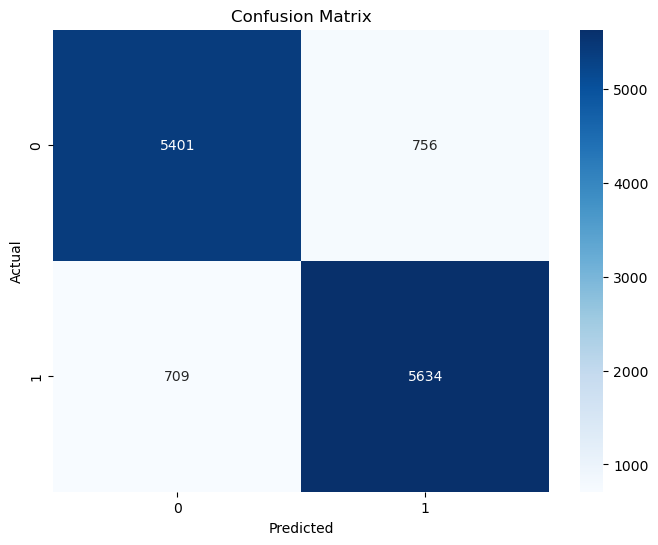

In [26]:
# Generar la matriz de confusión
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predecir los valores
y_pred = modelo.predict(X_test)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conlusiones

El modelo de Regresión Logística ha sido entrenado y evaluado con éxito. La precisión del modelo puede mejorarse ajustando los hiperparámetros o utilizando técnicas de procesamiento de texto más avanzadas como TF-IDF o modelos de Deep Learning.